## Data preparation and EDA

In [62]:
import os
path = "C:\\Users\\Mutum\\Desktop\\testing\\Dataset\\Dataset"
os.chdir(path)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

import missingno as msno

pd.options.display.float_format = '{:.2f}'.format

### Data preparation

In [7]:
train =  pd.read_csv("Train.csv",encoding = "ISO-8859-1")
test  = pd.read_csv("Test.csv",encoding = "ISO-8859-1")

print(train.shape)
print(test.shape)
print("_ _"*20)

print(f"target varible,balanced check:")
train.Disbursed.value_counts()

(87020, 26)
(37717, 24)
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _
target varible,balanced check:


0    85747
1     1273
Name: Disbursed, dtype: int64

In [9]:
train.head()
#train.Disbursed.value_counts()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [10]:
# data_train.info()
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [12]:
categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print(categorical_columns)
print("- -"*20)
print(numerical_columns)

['ID', 'Gender', 'City', 'DOB', 'Lead_Creation_Date', 'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source']
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI', 'Var5', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate', 'Processing_Fee', 'EMI_Loan_Submitted', 'Var4', 'LoggedIn', 'Disbursed']


In [ ]:
# takes long to plot for all variable, hence commented, yet if you want, you can try
# fig = plt.figure(figsize=(25, 15))
# cols = 5
# rows = np.ceil(float(data_train.shape[1]) / cols)
# for i, column in enumerate(data_train.columns):
#     ax = fig.add_subplot(rows, cols, i + 1)
#     ax.set_title(column)
#     if data_train.dtypes[column] == np.object:
#         data_train[column].value_counts().plot(kind="bar", axes=ax)
#     else:
#         data_train[column].hist(axes=ax)
#         plt.xticks(rotation="vertical")
# plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [13]:
set(train.columns) - set(test.columns)

{'Disbursed', 'LoggedIn'}

In [69]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True)
data.shape

(124737, 27)

# Missing data analysis

In [15]:
# data.isnull().any()
missing = data.apply(lambda x: sum(x.isnull())).sort_values(ascending=False).reset_index()
missing.rename(columns={"index":"Variable",0:"missing_counts"},inplace=True)
missing["missing_percentage"] = (missing["missing_counts"] / data.shape[0]) *100
missing = missing[missing["missing_counts"]>0]
missing

,Variable,missing_counts,missing_percentage
0,Processing_Fee,85346,68.420757
1,EMI_Loan_Submitted,84901,68.064007
2,Interest_Rate,84901,68.064007
3,Loan_Amount_Submitted,49535,39.711553
4,Loan_Tenure_Submitted,49535,39.711553
5,LoggedIn,37717,30.237219
6,Disbursed,37717,30.237219
7,Salary_Account,16801,13.469139
8,City,1401,1.123163
9,Employer_Name,113,0.090591


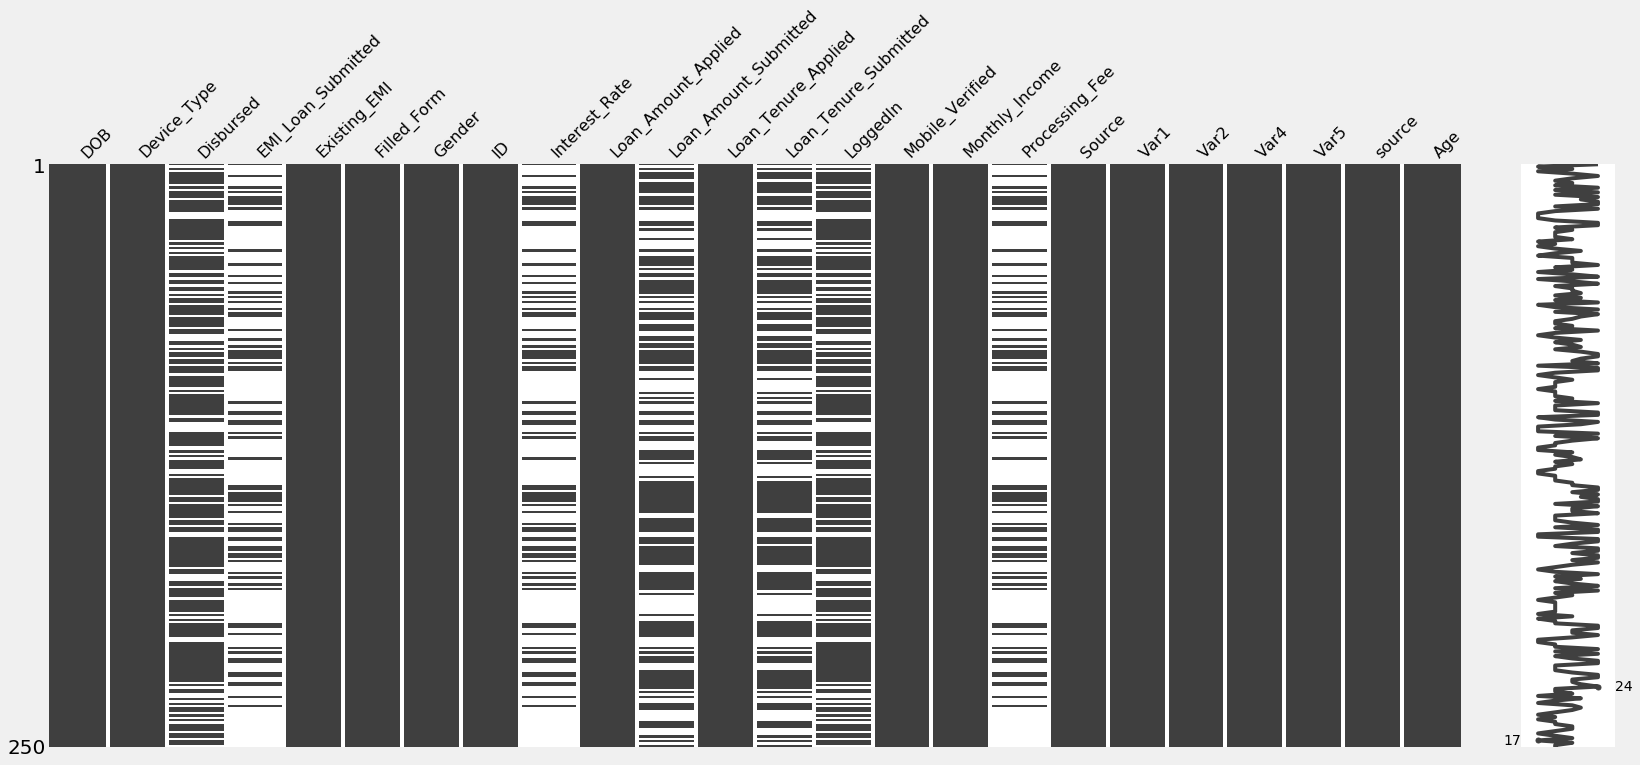

In [56]:
msno.matrix(data.sample(250));  # missingness in a sample of 250

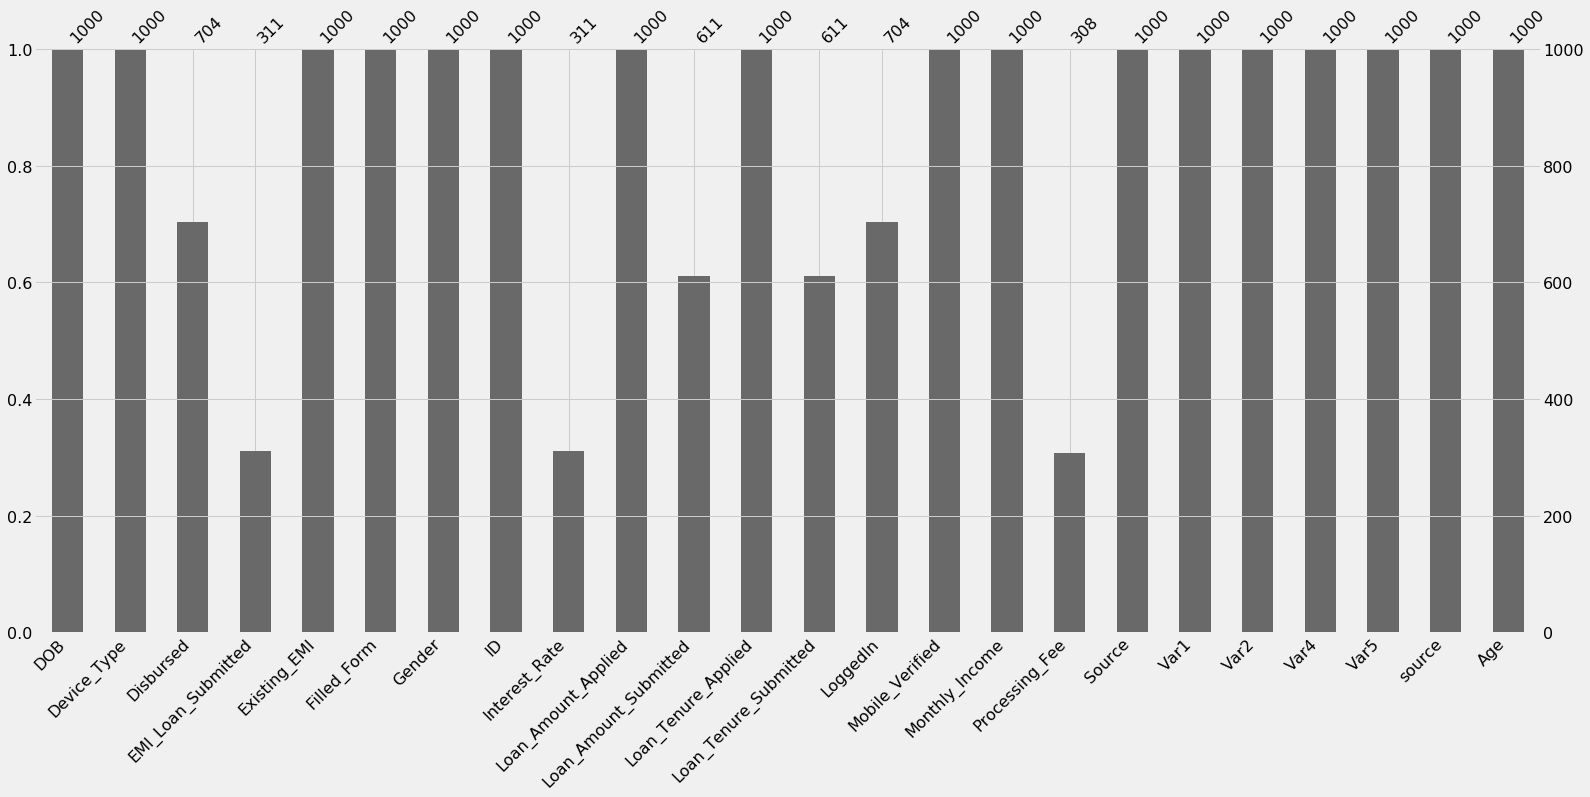

In [55]:
msno.bar(data.sample(1000));  # missingness in a sample of 1000

# levels check of categorial variables

**okay some of variables like ID,DOB etc shouldn`t be categorical, datatypes can be changed yet let it be for now**

In [18]:
#categorical_columns

result ={}
for col in categorical_columns:
    result[col] = data[col].nunique()
    
df = (pd.DataFrame.from_dict(result,orient='index',columns=["label_counts"])
                            .reset_index()
                            .rename(columns={"index":"Variable_name"})
                            .sort_values(by ="label_counts",ascending=False)  
     )
df

,Variable_name,label_counts
0,ID,124737
5,Employer_Name,57193
3,DOB,12230
2,City,723
4,Lead_Creation_Date,92
6,Salary_Account,58
12,Source,34
8,Var1,19
11,Var2,7
1,Gender,2


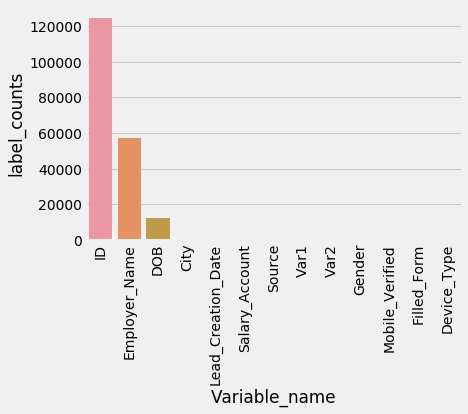

In [54]:
sns.barplot(x="Variable_name",y="label_counts",data=df)
plt.xticks(rotation = 90);

### Deleting variables:
These variable are deleted, either not effecting target or having huge levels which can be work out though ,yet removed

- City : There are 723 city, we can group them say North,South,East etc. yet we are removing them for now
- Employer_Name : 57193 unique companies, can group them like small,medium,entreprise etc. yet removing
- Lead_Creation_Date : 92 , doesnt sounds like it will effect target variable
- salary account : Can be manually group though

In [74]:
variables = ["City","Employer_Name","Lead_Creation_Date","Salary_Account"]
data.drop(variables,axis=1,inplace=True)

In [75]:
data.columns

Index(['Device_Type', 'Disbursed', 'EMI_Loan_Submitted', 'Existing_EMI',
       'Filled_Form', 'Gender', 'ID', 'Interest_Rate', 'Loan_Amount_Applied',
       'Loan_Amount_Submitted', 'Loan_Tenure_Applied', 'Loan_Tenure_Submitted',
       'LoggedIn', 'Mobile_Verified', 'Monthly_Income', 'Processing_Fee',
       'Source', 'Var1', 'Var2', 'Var4', 'Var5', 'source', 'age_bracket'],
      dtype='object')

In [22]:
data.head()

,DOB,Device_Type,Disbursed,EMI_Loan_Submitted,Existing_EMI,Filled_Form,Gender,ID,Interest_Rate,Loan_Amount_Applied,...,LoggedIn,Mobile_Verified,Monthly_Income,Processing_Fee,Source,Var1,Var2,Var4,Var5,source
0,23-May-78,Web-browser,0.0,NaN,0.0,N,Female,ID000002C20,NaN,300000.0,...,0.0,N,20000,NaN,S122,HBXX,G,1,0,train
1,07-Oct-85,Web-browser,0.0,6762.9,0.0,N,Male,ID000004E40,13.25,200000.0,...,0.0,Y,35000,NaN,S122,HBXA,G,3,13,train
2,10-Oct-81,Web-browser,0.0,NaN,0.0,N,Male,ID000007H20,NaN,600000.0,...,0.0,Y,22500,NaN,S143,HBXX,B,1,0,train
3,30-Nov-87,Web-browser,0.0,NaN,0.0,N,Male,ID000008I30,NaN,1000000.0,...,0.0,Y,35000,NaN,S143,HBXX,B,3,10,train
4,17-Feb-84,Web-browser,0.0,NaN,25000.0,N,Male,ID000009J40,NaN,500000.0,...,1.0,Y,100000,NaN,S134,HBXX,B,3,17,train


## Feature engineering

**Age bracket**

In [70]:
data['Age']  = data.DOB.apply(lambda x : int(x[-2:]))#.plot(kind="box");
data['Age'].head()

0    78
1    85
2    81
3    87
4    84
Name: Age, dtype: int64

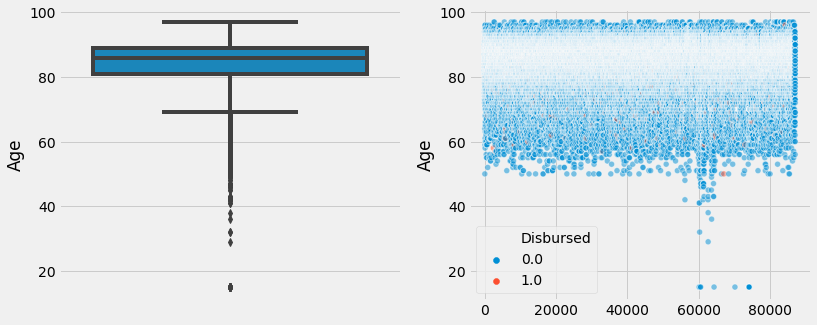

In [63]:
plt.figure(figsize=[12,5],frameon=True)
plt.subplot(1,2,1)

sns.boxplot(y="Age",data=data);

plt.subplot(1,2,2)
ax2 = fig.add_subplot(222)
sns.scatterplot(x = range(0,data.shape[0]),y="Age",data=data,hue="Disbursed",alpha= 0.5);

Looking at above figure,created five age bucket and dropping age and DOB variable

In [71]:

data["age_bracket"] = pd.cut(data["Age"],bins=5,labels=["young", "mid", "medium","old","oldest"]) 
# [(14.918, 31.4] < (31.4, 47.8] < (47.8, 64.2] < (64.2, 80.6] < (80.6, 97.0]]

In [72]:
val = ["Age","DOB"]
data.drop(val,axis=1,inplace=True)

In [80]:
data.columns

Index(['Device_Type', 'Disbursed', 'EMI_Loan_Submitted', 'Existing_EMI',
       'Filled_Form', 'Gender', 'ID', 'Interest_Rate', 'Loan_Amount_Applied',
       'Loan_Amount_Submitted', 'Loan_Tenure_Applied', 'Loan_Tenure_Submitted',
       'LoggedIn', 'Mobile_Verified', 'Monthly_Income', 'Processing_Fee',
       'Source', 'Var1', 'Var2', 'Var4', 'Var5', 'source', 'age_bracket'],
      dtype='object')

**EMI_Loan_Submitted**

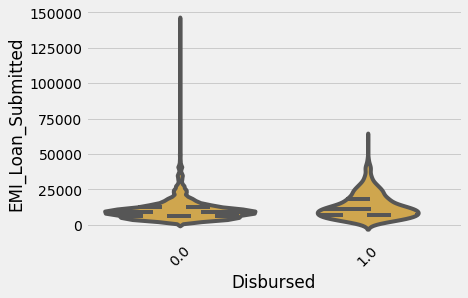

In [89]:
sns.violinplot(data=data,x="Disbursed",y="EMI_Loan_Submitted",color= sns.color_palette()[2],inner="quartile")
plt.xticks(rotation=45);

Remember we have 68% missing for this variable. And looking at above figure, distribution of target labels
are almost same exept we have huge tails for non-dispurse loan. So we`ll create  variable

- EMI submitted or not


In [98]:
data['EMI_Loan_Submitted_Y/N'] = data['EMI_Loan_Submitted'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [102]:
data.drop("EMI_Loan_Submitted",axis=1,inplace=True)

### Existing_EMI

In [120]:
data.Existing_EMI.describe()

count     124626.00
mean        3636.34
std        33691.24
min            0.00
25%            0.00
50%            0.00
75%         3500.00
max     10000000.00
Name: Existing_EMI, dtype: float64

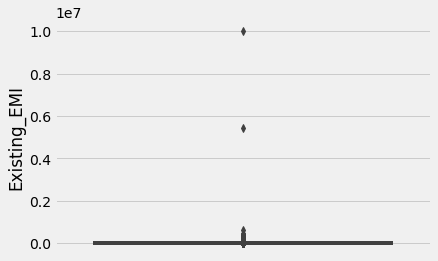

In [121]:
sns.boxplot(y="Existing_EMI",data=data);

In [122]:
#Impute by median (0) because just 111 missing:
data['Existing_EMI'].fillna(0, inplace=True)


### Interest Rate:

In [124]:
#Majority values missing so I'll create a new variable stating whether this is missing or note:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
print(data[['Interest_Rate','Interest_Rate_Missing']].head(5))

   Interest_Rate  Interest_Rate_Missing
0            nan                      1
1          13.25                      0
2            nan                      1
3            nan                      1
4            nan                      1


In [125]:
data.drop('Interest_Rate',axis=1,inplace=True)

### Loan Amount and Tenure applied:

In [127]:
#Impute with median because only 111 missing:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

### Loan Amount and Tenure selected

In [128]:
#High proportion missing so create a new var whether present or not
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [129]:
#Remove old vars
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

### Remove logged-in

In [130]:
data.drop('LoggedIn',axis=1,inplace=True)

### Processing_Fee

In [132]:
#High proportion missing so create a new var whether present or not
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
#drop old
data.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [133]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

### Final Data:

In [134]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
age_bracket                          0
EMI_Loan_Submitted_Y/N               0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [135]:
data.dtypes

Device_Type                        object
Disbursed                         float64
Existing_EMI                      float64
Filled_Form                        object
Gender                             object
ID                                 object
Loan_Amount_Applied               float64
Loan_Tenure_Applied               float64
Mobile_Verified                    object
Monthly_Income                      int64
Source                             object
Var1                               object
Var2                               object
Var4                                int64
Var5                                int64
source                             object
age_bracket                      category
EMI_Loan_Submitted_Y/N              int64
Interest_Rate_Missing               int64
Loan_Amount_Submitted_Missing       int64
Loan_Tenure_Submitted_Missing       int64
Processing_Fee_Missing              int64
dtype: object

### Numerical Coding:

In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Mobile_Verified','Var1','Var2','age_bracket','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

### One-Hot Coding

In [137]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'EMI_Loan_Submitted_Y/N', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Var1_0', 'Var1_1', 'Var1_2',
       'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7', 'Var1_8', 'Var1_9',
       'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13', 'Var1_14', 'Var1_15',
       'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0', 'Var2_1', 'Var2_2', 'Var2_3',
       'Var2_4', 'Var2_5', 'Var2_6', 'age_bracket_0', 'age_bracket_1',
       'age_bracket_2', 'age_bracket_3', 'age_bracket_4', 'Source_0',
       'Source_1', 'Source_2'],
      dtype='object')

### Separate train & test:

In [138]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [139]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

In [140]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)